# User Analytics in the Telecommunication Industry

### Importing necessary Libraries 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import math
import seaborn as sns
import plotly.express as px


### Loading the Dataset

In [2]:
df= pd.read_excel("D:\\Digicrome classes\\NextHIkes\\Project 5\\telcom_data (2).xlsx")

### Exploring the Data 

In [5]:
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
df.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0
150000,,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Start,150000,2019-04-26 12:36:38.953740032,2019-04-04 12:01:18,2019-04-25 00:26:00.750000128,2019-04-26 08:51:24.500000,2019-04-27 18:18:59.750000128,2019-04-29 07:28:43,NaN
Start ms,150000.0,499.1882,0.0,250.0,499.0,749.0,999.0,288.611834
End,150000,2019-04-27 17:40:08.059673344,2019-04-24 22:59:58,2019-04-26 07:30:11.500000,2019-04-27 23:02:05,2019-04-29 07:15:07.500000,2019-04-30 23:59:27,NaN
End ms,150000.0,498.80088,0.0,251.0,500.0,750.0,999.0,288.097653
Dur. (ms),150000.0,104608.560347,7142.0,57440.5,86399.0,132430.25,1859336.0,81037.621479
IMSI,149431.0,208201639651669.0625,204047108489451.0,208201401263249.0,208201546329113.0,208201771619103.0,214074303349628.0,21488090841.366436
MSISDN/Number,148935.0,41882819545.027359,33601001722.0,33651295581.5,33663706799.0,33683490769.0,882397108489451.0,2447443358621.660156
IMEI,149429.0,48474547977654.53125,440015202000.0,35460708865439.0,35722009426311.0,86119704674953.0,99001201327774.0,22416372027957.652344
Avg RTT DL (ms),122172.0,109.795706,0.0,32.0,45.0,70.0,96923.0,619.782739
Avg RTT UL (ms),122189.0,17.662883,0.0,2.0,5.0,15.0,7120.0,84.793524


### Checking For Null Values

In [6]:
df.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

#### Inferences:
##### Features like Nb of sec with 125000B < Vol DL, Nb of sec with 1250B < Vol UL < 6250B, Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL, Nb of sec with 6250B < Vol DL < 31250B, Nb of sec with 6250B < Vol UL < 37500B has more than 50% of Null values and it is best to drop them.
##### All the other features comprising of Null Values, consist of really small number of null values, we can either replace it with mean, median or mode

#### Dropping the features with more than 50% Null Values 

In [7]:
df.drop(['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','HTTP DL (Bytes)','HTTP UL (Bytes)','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B'],axis=1,inplace=True)

In [8]:
df.isnull().sum()

Bearer Id                             0
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


#### Now starting to handle all the other Null Values 
#### Dropping the row no. 150000 as it have most no. of single null values

In [9]:
df.drop(150000,axis=0,inplace=True)

In [10]:
df.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149995,13042425979329300480,2019-04-29 07:28:41,615.0,2019-04-30 00:01:49,407.0,59587.0,2.082014e+14,3.366865e+10,3.533251e+13,T85721A,...,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.0,3322253.0,13172589.0,352536971.0,2529475.0,814713113.0,1406930.0,29626096.0,371895920.0


In [16]:
df.isnull().sum()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                569
MSISDN/Number                      1065
IMEI                                571
Last Location Name                 1152
Avg RTT DL (ms)                   27828
Avg RTT UL (ms)                   27811
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 753
50 Kbps < DL TP < 250 Kbps (%)      753
250 Kbps < DL TP < 1 Mbps (%)       753
DL TP > 1 Mbps (%)                  753
UL TP < 10 Kbps (%)                 791
10 Kbps < UL TP < 50 Kbps (%)       791
50 Kbps < UL TP < 300 Kbps (%)      791
UL TP > 300 Kbps (%)                791
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


#### Dropping null values of IMSI, MSISDN/Number, IMEI, Last location Name,DL TP < 50 Kbps (%), 50 Kbps < DL TP < 250 Kbps (%), 250 Kbps < DL TP < 1 Mbps (%), DL TP > 1 Mbps (%),UL TP < 10 Kbps (%), 10 Kbps < UL TP < 50 Kbps (%), 50 Kbps < UL TP < 300 Kbps (%), UL TP > 300 Kbps (%),'Handset Manufacturer','Handset Type','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B' as they are considerably very low

In [11]:
df.dropna(subset=['IMSI',
                  'MSISDN/Number',
                  'IMEI',
                  'Last Location Name',
                  'DL TP < 50 Kbps (%)',
                  '50 Kbps < DL TP < 250 Kbps (%)',
                  '250 Kbps < DL TP < 1 Mbps (%)',
                  'DL TP > 1 Mbps (%)',
                  'UL TP < 10 Kbps (%)',                
                  '10 Kbps < UL TP < 50 Kbps (%)',
                  '50 Kbps < UL TP < 300 Kbps (%)',     
                  'UL TP > 300 Kbps (%)',
                  'Handset Manufacturer',
                  'Handset Type',
                  'Nb of sec with Vol DL < 6250B',
                  'Nb of sec with Vol UL < 1250B'],inplace=True)

In [12]:
df.shape

(146891, 45)

#### Checking again for null values 

In [13]:
df.isnull().sum()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                    0
Avg RTT DL (ms)                   26145
Avg RTT UL (ms)                   26125
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                   0
50 Kbps < DL TP < 250 Kbps (%)        0
250 Kbps < DL TP < 1 Mbps (%)         0
DL TP > 1 Mbps (%)                    0
UL TP < 10 Kbps (%)                   0
10 Kbps < UL TP < 50 Kbps (%)         0
50 Kbps < UL TP < 300 Kbps (%)        0
UL TP > 300 Kbps (%)                  0
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


#### As Features like Avg RTT DL(ms), Avg RTT UL(ms) have high number of missing values, we will replace the values with median values

In [18]:
df['Avg RTT DL (ms)']= df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].mean())

In [16]:
df['Avg RTT UL (ms)'] = df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].mean())


#### again checking for null values

In [21]:
df.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

#### Now checking for Duplicate rows

In [22]:
df.duplicated().sum()

np.int64(0)

#### There are no Duplicate rows present 

In [24]:
# exporting the cleaned data to CSV gor future usage
df.to_csv("D:\\Digicrome classes\\NextHIkes\\Project 5\\cleaned_data")

In [25]:
df.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


## Task 1- User Overview Analysis

#### Start by identifying the top 10 handsets used by the customers.

In [26]:
df['Handset Type'].value_counts().head(10)

Handset Type
Huawei B528S-23A                19373
Apple iPhone 6S (A1688)          9369
Apple iPhone 6 (A1586)           8967
undefined                        8820
Apple iPhone 7 (A1778)           6240
Apple iPhone Se (A1723)          5151
Apple iPhone 8 (A1905)           4961
Apple iPhone Xr (A2105)          4542
Samsung Galaxy S8 (Sm-G950F)     4404
Apple iPhone X (A1901)           3788
Name: count, dtype: int64

Text(0.5, 1.0, 'top 10 handsets')

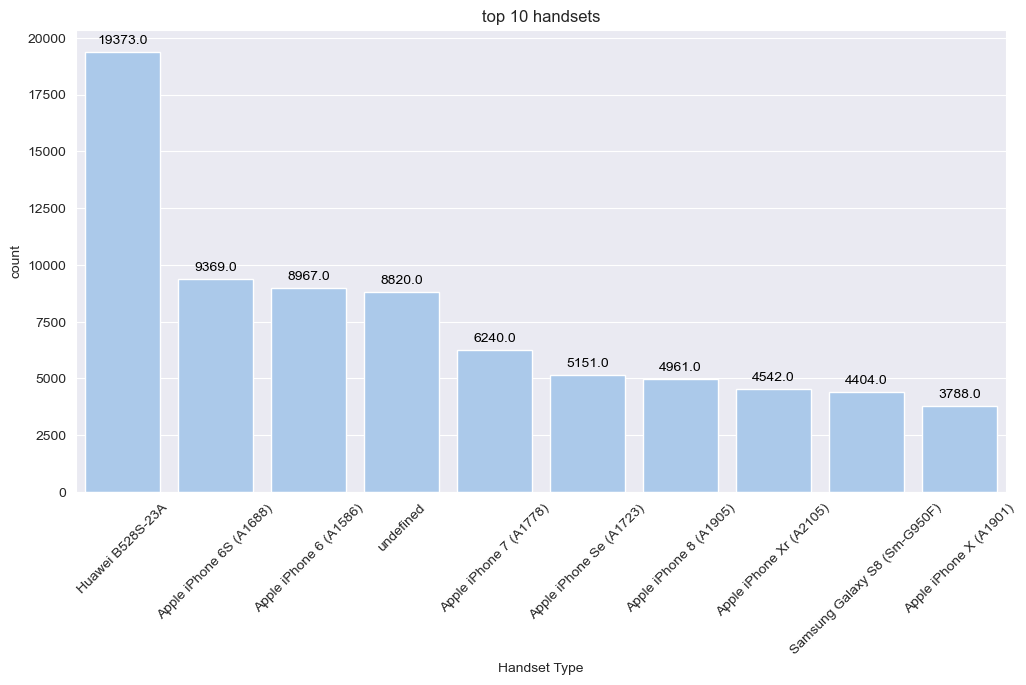

In [27]:
sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
ax=sns.barplot(x= df['Handset Type'].value_counts().head(10).index, y = df['Handset Type'].value_counts().head(10))
for bar in ax.patches:
    height= bar.get_height()
    ax.annotate(f'{height}',(bar.get_x()+bar.get_width()/2,height),ha='center',va='bottom',fontsize=10,color='black',xytext=(0,4),textcoords='offset points')  
plt.xticks(rotation=45)
plt.title("top 10 handsets")


##### Infereneces:
##### 1. The most used handset by the people is Huawei B528S-23A(19373) followed by Apple Iphone6S(9369) and Apple Iphine 6(8967).

#### Identify the top 3 handset manufacturers

Text(0.5, 1.0, 'top 5 handset manufacturer')

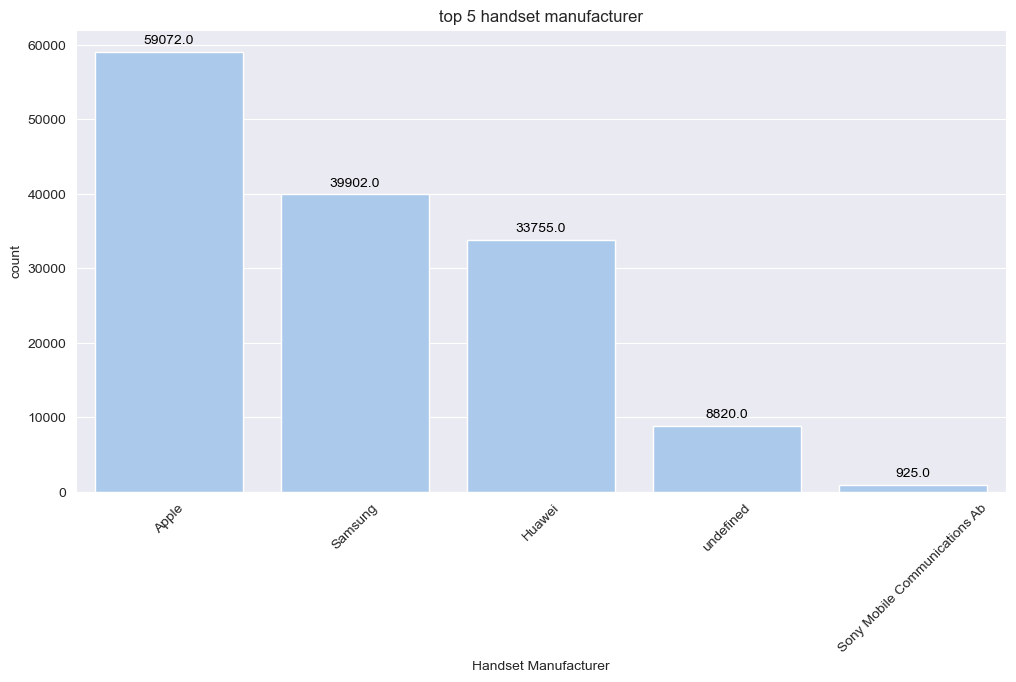

In [28]:
sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
ax=sns.barplot(x= df['Handset Manufacturer'].value_counts().head(5).index, y = df['Handset Manufacturer'].value_counts().head(5))
for bar in ax.patches:
    height= bar.get_height()
    ax.annotate(f'{height}',(bar.get_x()+bar.get_width()/2,height),ha='center',va='bottom',fontsize=10,color='black',xytext=(0,4),textcoords='offset points')  
plt.xticks(rotation=45)
plt.title("top 5 handset manufacturer")

#### Inference:
##### 1) The Top 3 Handset Manufacturing companies are Apple, Samsung and Huawei.

#### Identify the top 5 handsets per top 3 handset manufacturer

##### 1) Top 5 Apple Phones 

Text(0.5, 1.0, 'top 5 Apple Phones')

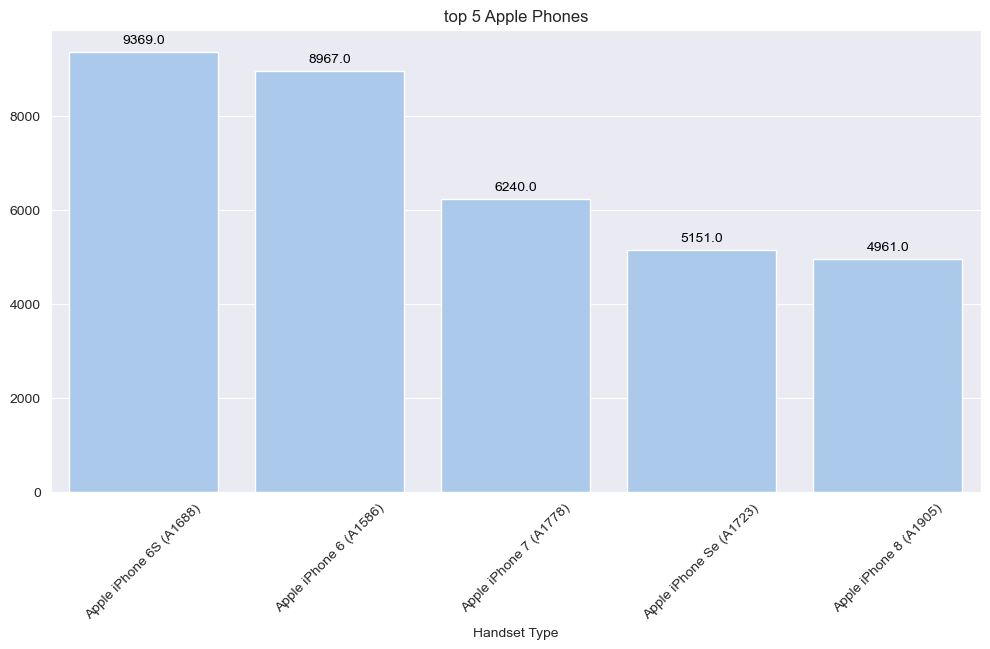

In [29]:
apple_phones = df[df['Handset Manufacturer'] == 'Apple']['Handset Type'].value_counts().head(5)
plt.figure(figsize=(12,6))
ax=sns.barplot(x= apple_phones.index, y=apple_phones.values)
for bar in ax.patches:
    height= bar.get_height()
    ax.annotate(f'{height}',(bar.get_x()+bar.get_width()/2,height),ha='center',va='bottom',fontsize=10,color='black',xytext=(0,4),textcoords='offset points')  
plt.xticks(rotation=45)
plt.title("top 5 Apple Phones")


#### Inferences
##### 1) Apple iphone 6s(9369 units)is the most popular phone that can be seen, which is closely followed by Apple iphone 6(8967 units), followed by Apple iphone 7(6240 units)

##### 2) Top 5 Samsung Phones

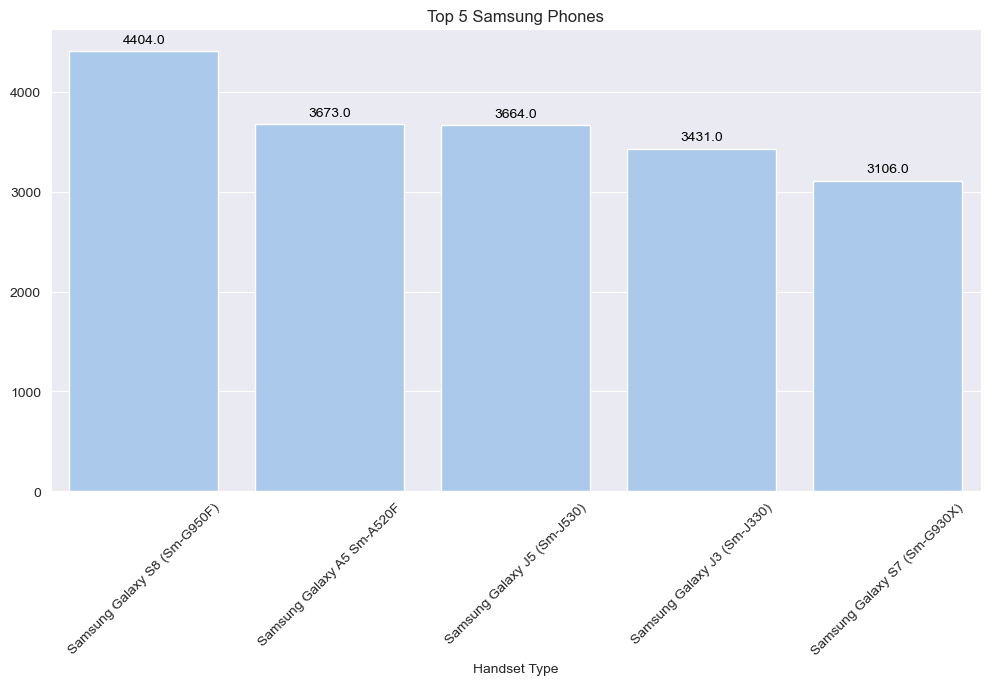

In [30]:
Samsung_phones= df[df['Handset Manufacturer']=='Samsung']['Handset Type'].value_counts().head(5)
plt.figure(figsize=(12,6))
ax= sns.barplot(x= Samsung_phones.index, y=Samsung_phones.values)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',(bar.get_x()+bar.get_width()/2,height), ha='center', va='bottom', fontsize=10, color='black', xytext=(0,4), textcoords='offset points')
    plt.xticks(rotation=45)
    plt.title('Top 5 Samsung Phones')

#### Inferences
##### 1) Samsung Galaxy S8(4404 units) is the most popular Samsung Phone, followed by Samsung Galaxy A5(3673 units) and Samsung Galaxy J5(3664 units).

#### 3) Top 5 Huawei Phones 

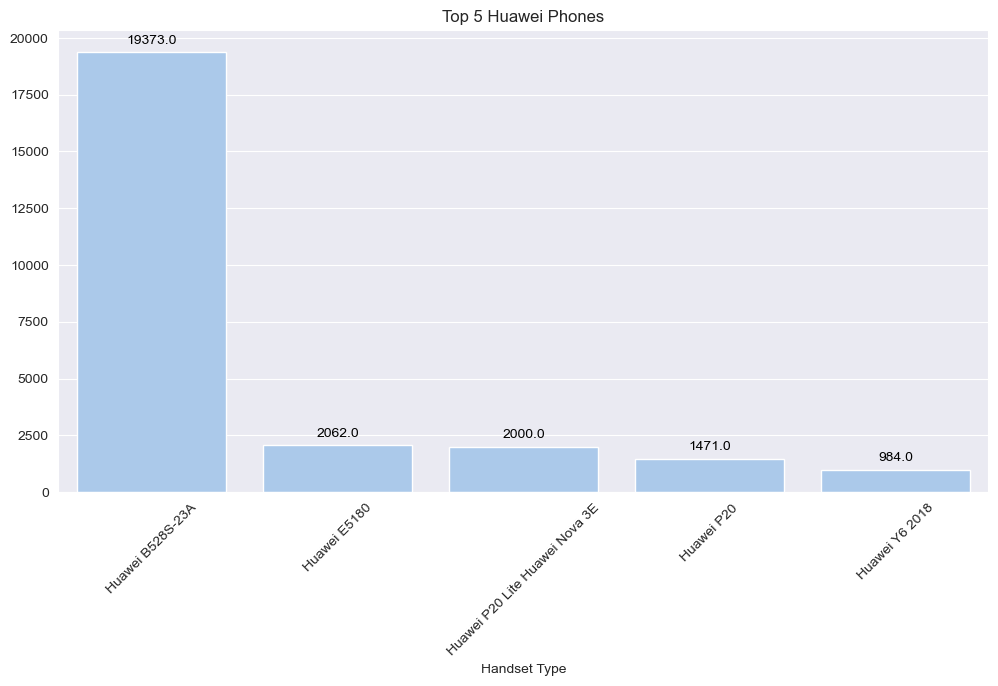

In [31]:
Huawei_phones= df[df['Handset Manufacturer']=='Huawei']['Handset Type'].value_counts().head(5)
plt.figure(figsize=(12,6))
ax= sns.barplot(x= Huawei_phones.index, y=Huawei_phones.values)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',(bar.get_x()+bar.get_width()/2,height), ha='center', va='bottom', fontsize=10, color='black', xytext=(0,4), textcoords='offset points')
    plt.xticks(rotation=45)
    plt.title('Top 5 Huawei Phones')

#### Inference:
##### 1) Huawei B528S-23A(19373 units) is the most popular Handset Type with huge margin, all the other Huawei handsets are at only 2000 units 

### Task 1.1

In [32]:
user_agg = df.groupby("MSISDN/Number").agg(
    number_of_xDR_sessions = ("Bearer Id", "nunique"),     
    total_session_duration = ("Dur. (ms)", "sum"),
    avg_session_duration = ("Dur. (ms)", "mean"),
    total_download = ("Total DL (Bytes)", "sum"),          
    total_upload = ("Total UL (Bytes)", "sum")             
).reset_index()

# Add total data volume
user_agg["total_data_volume"] = user_agg["total_download"] + user_agg["total_upload"]

user_agg.head(10)


,MSISDN/Number,number_of_xDR_sessions,total_session_duration,avg_session_duration,total_download,total_upload,total_data_volume
0,3.360100e+10,1,116720.0,116720.0,8.426375e+08,36053108.0,8.786906e+08
1,3.360100e+10,1,181230.0,181230.0,1.207552e+08,36104459.0,1.568596e+08
2,3.360100e+10,1,134969.0,134969.0,5.566597e+08,39306820.0,5.959665e+08
3,3.360101e+10,1,49878.0,49878.0,4.019932e+08,20327526.0,4.223207e+08
4,3.360101e+10,2,37104.0,18552.0,1.363130e+09,94280527.0,1.457411e+09
5,3.360101e+10,2,253983.0,126991.5,5.552080e+08,60009249.0,6.152172e+08
6,3.360101e+10,2,128360.0,64180.0,5.530412e+08,101681858.0,6.547231e+08
7,3.360101e+10,1,86399.0,86399.0,2.940851e+08,38575279.0,3.326604e+08
8,3.360101e+10,2,495702.0,247851.0,8.965602e+08,93572016.0,9.901322e+08
9,3.360102e+10,1,124854.0,124854.0,6.853728e+08,47091008.0,7.324638e+08


In [33]:
pd.set_option("display.float_format","{:.0f}".format) # so the scientific gets removed from displaying the data

#### largest number of xDR Session 

In [34]:
xDR = df.groupby('MSISDN/Number').agg(number_of_xDR_Session =('Bearer Id','nunique'))
top_10_xDR = xDR.nlargest(10, columns='number_of_xDR_Session')
top_10_xDR

,number_of_xDR_Session
MSISDN/Number,
33626320676,18
33614892860,17
33625779332,17
33659725664,16
33675877202,15
33760536639,15
33667163239,13
33603127838,12
33604515716,12


### Aggregation of Total Downloads and Uploads

In [35]:
# Aggregation of Total values
df["Total Uploads"]=df["Google UL (Bytes)"]+df["Email UL (Bytes)"]+df["Social Media UL (Bytes)"]+df["Youtube UL (Bytes)"]+df["Netflix UL (Bytes)"]+df["Gaming UL (Bytes)"]+df["Other UL (Bytes)"]
df["Total Downloads"]=df["Google DL (Bytes)"]+df["Email DL (Bytes)"]+df["Social Media DL (Bytes)"]+df["Youtube DL (Bytes)"]+df["Netflix DL (Bytes)"]+df["Gaming DL (Bytes)"]+df["Other DL (Bytes)"]
df['Total UL and DL']=df['Total DL (Bytes)']+df["Total UL (Bytes)"]

In [36]:
avg_time_per_user = df.groupby('MSISDN/Number').agg({'Dur. (ms).1': 'mean'})
avg_time_per_user.rename(columns={'Dur. (ms).1': 'Average session duration (ms)'}, inplace=True)
avg_time_per_user.sort_values(by=['Average session duration (ms)'], ascending=False).head(10)

,Average session duration (ms)
MSISDN/Number,
33669260221,1573420996
33661715300,1480875272
33607498825,1474663399
33762601828,1375612670
33760627129,1361762651
33761667219,1357643593
33750343200,1321509685
33666816945,1299381954
33698695185,1209607515


#### Task 1.2

#### Starting with Non-Graphical and Graphical Univariate analysis of important variables

#### 1) Dur.(ms) - Total Duration of the xDR(in ms)

In [37]:
df[['Dur. (ms)']].describe()

,Dur. (ms)
count,146891
mean,105230
std,80924
min,7142
25%,58527
50%,86399
75%,133154
max,1859336


Text(0.5, 1.0, 'Distribution of Total Duration of the xDr(in ms)')

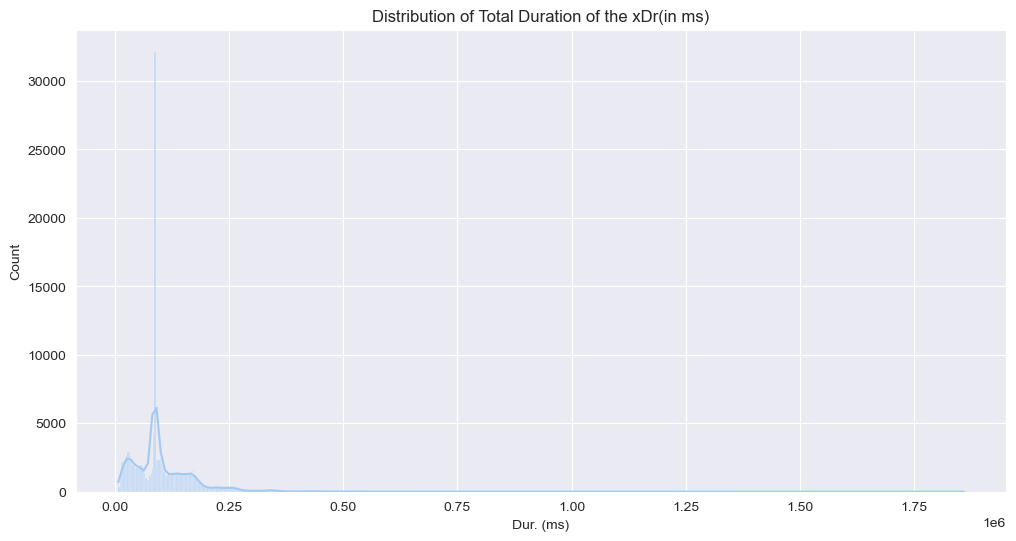

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df['Dur. (ms)'],kde=True,)
plt.title('Distribution of Total Duration of the xDr(in ms)') 

#### 2) Total Upload MegaBytes (ms)

In [39]:
df[['Total UL (Bytes)']].describe()

,Total UL (Bytes)
count,146891
mean,41121388
std,11277746
min,2866892
25%,33218346
50%,41142534
75%,49034880
max,78331311


Text(0.5, 1.0, 'Total upload MegaBytes')

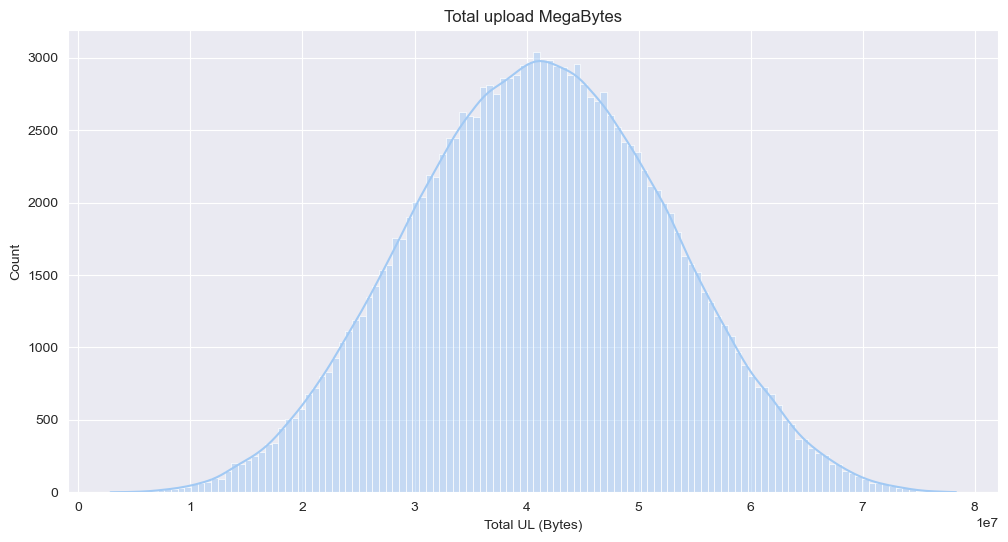

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df["Total UL (Bytes)"],kde=True)
plt.title('Total upload MegaBytes') 

#### 3) Total Download Megabytes

In [41]:
df[['Total DL (Bytes)']].describe()

,Total DL (Bytes)
count,146891
mean,454662771
std,244207953
min,7114041
25%,243076657
50%,455970194
75%,665783068
max,902969616


Text(0.5, 1.0, 'Total Download MegaBytes')

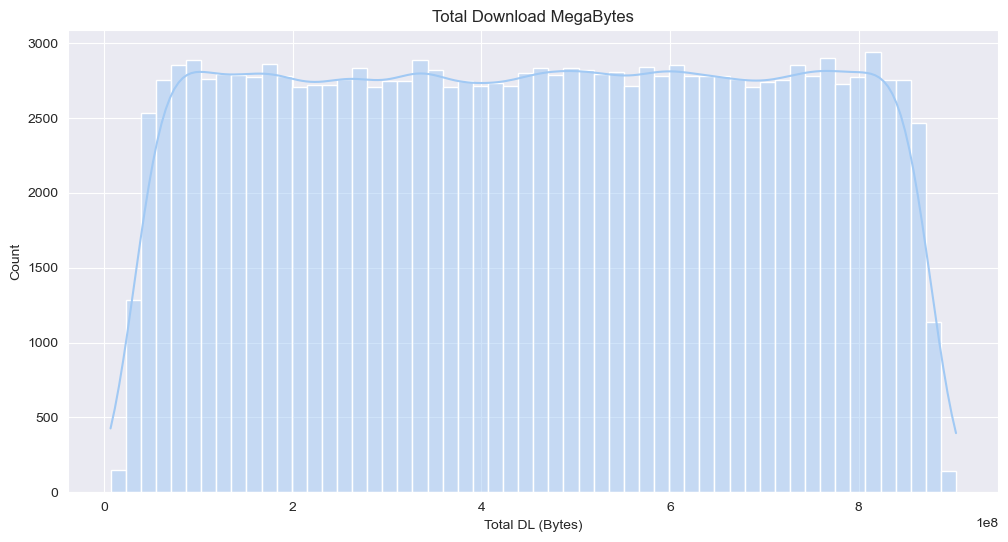

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df["Total DL (Bytes)"],kde=True)
plt.title('Total Download MegaBytes') 

#### 4) Total Downloads 

Text(0.5, 1.0, 'Distribution of Total Downloads')

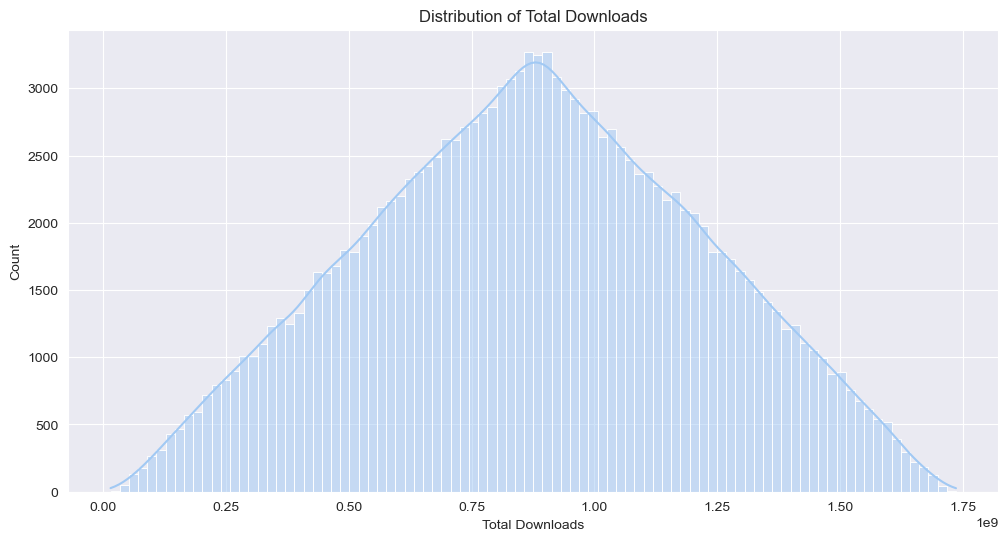

In [43]:

plt.figure(figsize=(12,6))
sns.histplot(df["Total Downloads"],kde=True)
plt.title('Distribution of Total Downloads') 

#### Aggregation of Total Social Media data

In [44]:
df["Youtube_Total_Data"]=df["Youtube DL (Bytes)"]+df["Youtube UL (Bytes)"]
df["Google_Total_Data"]=df["Google DL (Bytes)"]+df["Google UL (Bytes)"]
df["Email_Total_Data"]=df["Email DL (Bytes)"]+df["Email UL (Bytes)"]
df["Social_Media_Total_Data"]=df["Social Media DL (Bytes)"]+df["Social Media UL (Bytes)"]
df["Netflix_Total_Data"]=df["Netflix DL (Bytes)"]+df["Netflix UL (Bytes)"]
df["Gaming_Total_Data"]=df["Gaming DL (Bytes)"]+df["Gaming UL (Bytes)"]
df["Other_Total_Data"]=df["Other DL (Bytes)"]+df["Other UL (Bytes)"]

#### Total UL and DL volume of Bytes each application per user 

In [45]:
total_user = df.groupby('MSISDN/Number')[['Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']].sum()
total_user.nlargest(10, 'Total UL and DL')

,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
MSISDN/Number,,,,,,,,
33614892860,394370218,127973787,40788634,28294544,361401046,7749432234,7639263572,8846226494
33760536639,396289198,123223099,33693767,39783189,334643269,7461045228,4716134493,8514773963
33625779332,452958769,142307915,40633966,27135500,356980607,7326673487,6354583086,8499620722
33626320676,374483047,152191852,42418782,43374779,328725740,6887572116,8167877776,7971167261
33675877202,317410572,109860502,31514421,19222921,309093159,6970567597,6798515150,7891110608
33659725664,257991088,116516345,35999792,35412358,399519079,6725559211,6317415487,7705862783
33666464084,227336012,89320737,25557139,18629986,214416926,6646303338,4349141478,7308500938
33760413819,303169107,82738720,25576965,20777205,318347546,6268619592,4101645436,7132370514
33664712899,276834013,90389372,21426007,19390599,251798809,6103856008,3976960308,6872018208


#### Youtube total Data

In [46]:
df[['Youtube_Total_Data']].describe()

,Youtube_Total_Data
count,146891
mean,22641990
std,9244557
min,129655
25%,15997340
50%,22663408
75%,29293420
max,45190078


Text(0.5, 1.0, 'Distribution of Youtube Total Data')

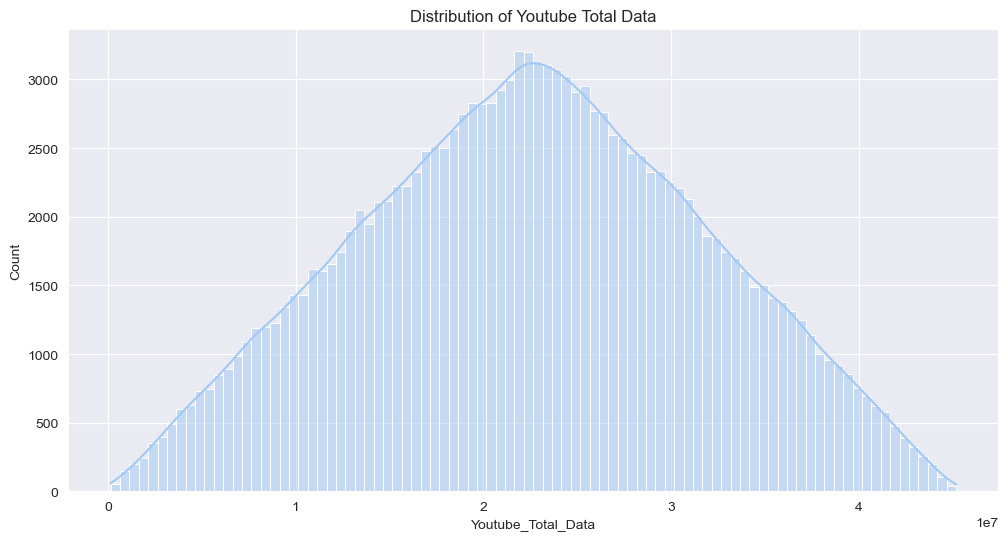

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df['Youtube_Total_Data'],kde=True)
plt.title('Distribution of Youtube Total Data')

#### Google Total Data

In [48]:
df[['Google_Total_Data']].describe()

,Google_Total_Data
count,146891
mean,7807978
std,3517121
min,40330
25%,4943585
50%,7815399
75%,10683144
max,15528782


Text(0.5, 1.0, 'Distribution of Google Total Data')

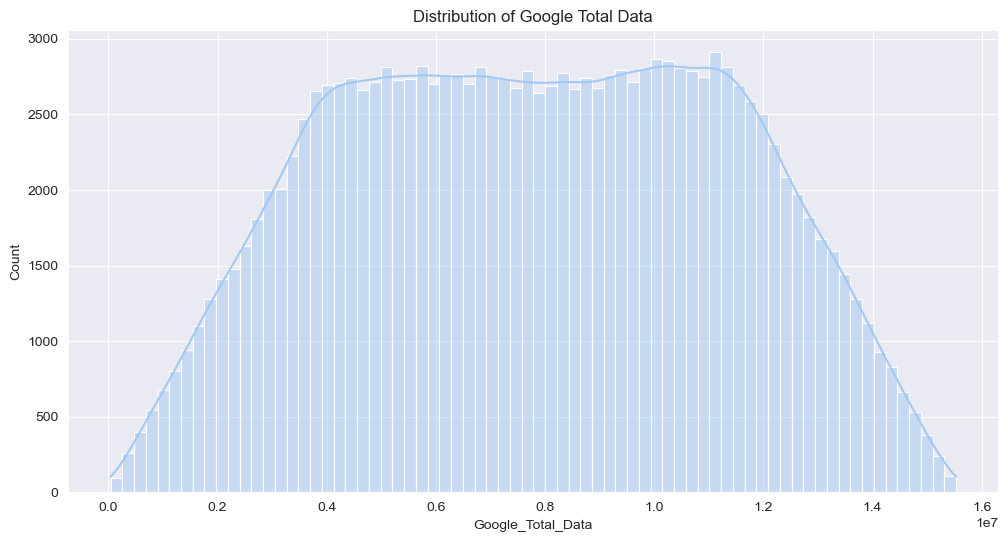

In [49]:
plt.figure(figsize=(12,6))
sns.histplot(df['Google_Total_Data'],kde=True)
plt.title('Distribution of Google Total Data')

#### Total Email Data

In [50]:
df[['Email_Total_Data']].describe()

,Email_Total_Data
count,146891
mean,2259078
std,1071128
min,8359
25%,1359012
50%,2263843
75%,3159587
max,4518036


Text(0.5, 1.0, 'Distribution of Email Total Data')

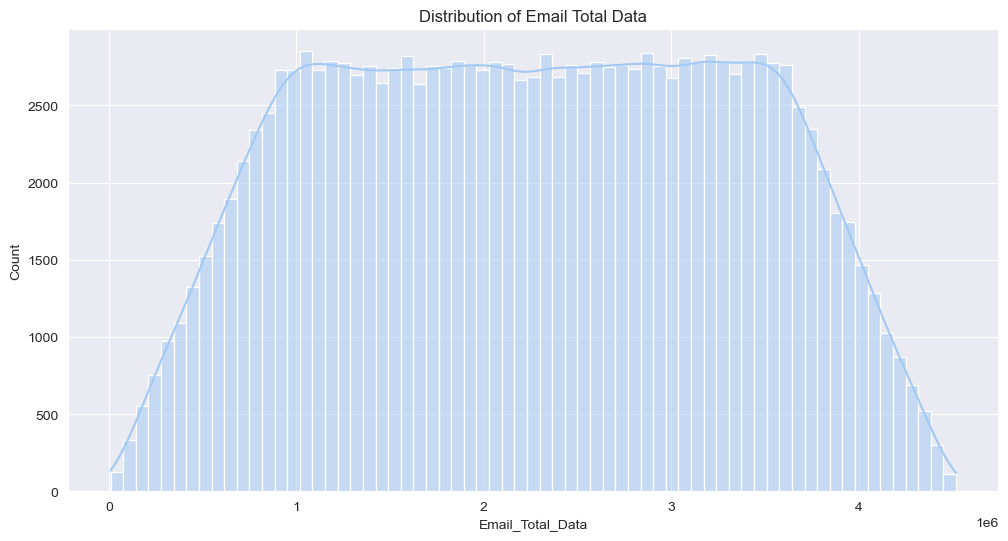

In [51]:
plt.figure(figsize=(12,6))
sns.histplot(df['Email_Total_Data'],kde=True)
plt.title('Distribution of Email Total Data')

#### Social Media Total Data

In [52]:
df[['Social_Media_Total_Data']].describe()

,Social_Media_Total_Data
count,146891
mean,1827740
std,1035571
min,1563
25%,931339
50%,1825390
75%,2727156
max,3650861


Text(0.5, 1.0, 'Distribution of Social Media Total Data')

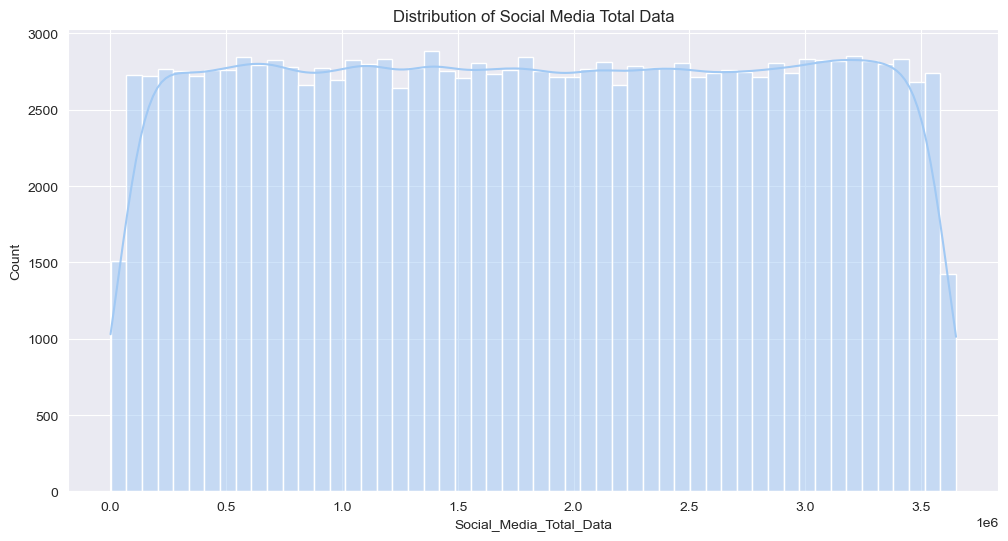

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(df['Social_Media_Total_Data'],kde=True)
plt.title('Distribution of Social Media Total Data')

#### Netflix Total Data

In [54]:
df[['Netflix_Total_Data']].describe()

,Netflix_Total_Data
count,146891
mean,22629360
std,9259223
min,98432
25%,15981996
50%,22634588
75%,29288154
max,45198153


Text(0.5, 1.0, 'Distribution of Netflix Total Data')

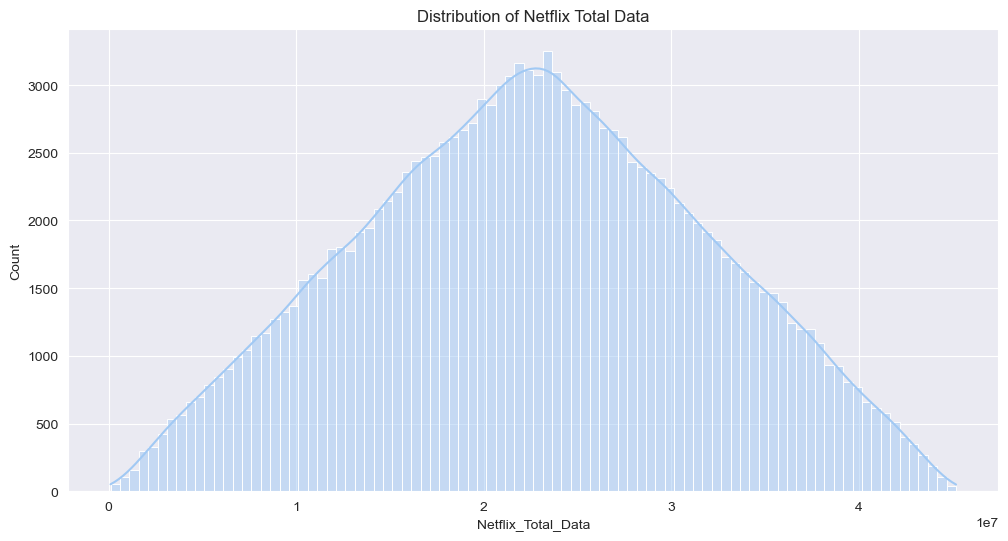

In [55]:
plt.figure(figsize=(12,6))
sns.histplot(df['Netflix_Total_Data'],kde=True)
plt.title('Distribution of Netflix Total Data')

### Gaming Total Data

In [56]:
df[['Gaming_Total_Data']].describe()

,Gaming_Total_Data
count,146891
mean,430355126
std,244090217
min,306358
25%,218698198
50%,431665078
75%,641572846
max,859202784


Text(0.5, 1.0, 'Distribution of Gaming Total Data')

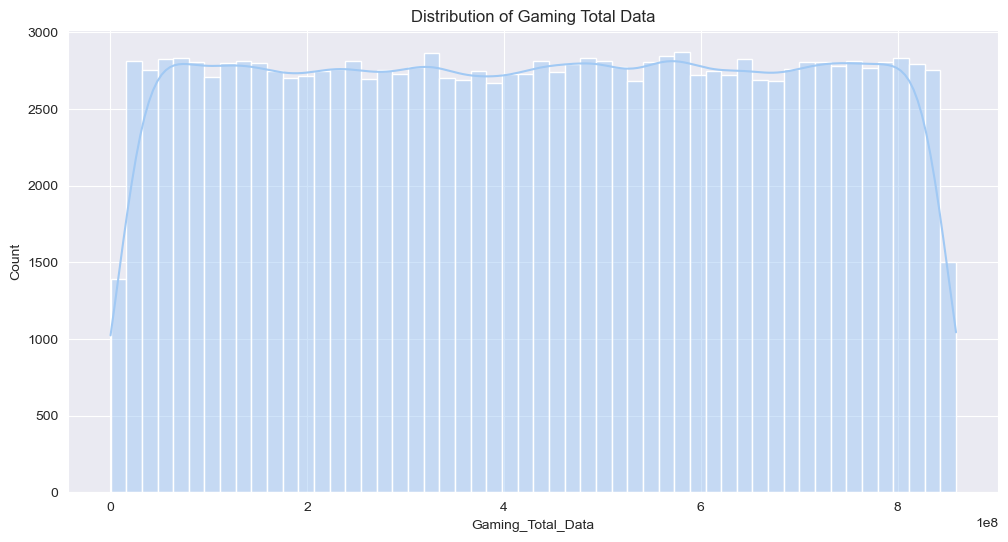

In [57]:
plt.figure(figsize=(12,6))
sns.histplot(df['Gaming_Total_Data'],kde=True)
plt.title('Distribution of Gaming Total Data')

#### Other Total Data

In [58]:
df[['Other_Total_Data']].describe()

,Other_Total_Data
count,146891
mean,429266672
std,243209547
min,149045
25%,218470640
50%,429797759
75%,639665594
max,859520934


Text(0.5, 1.0, 'Distribution of Other Total Data')

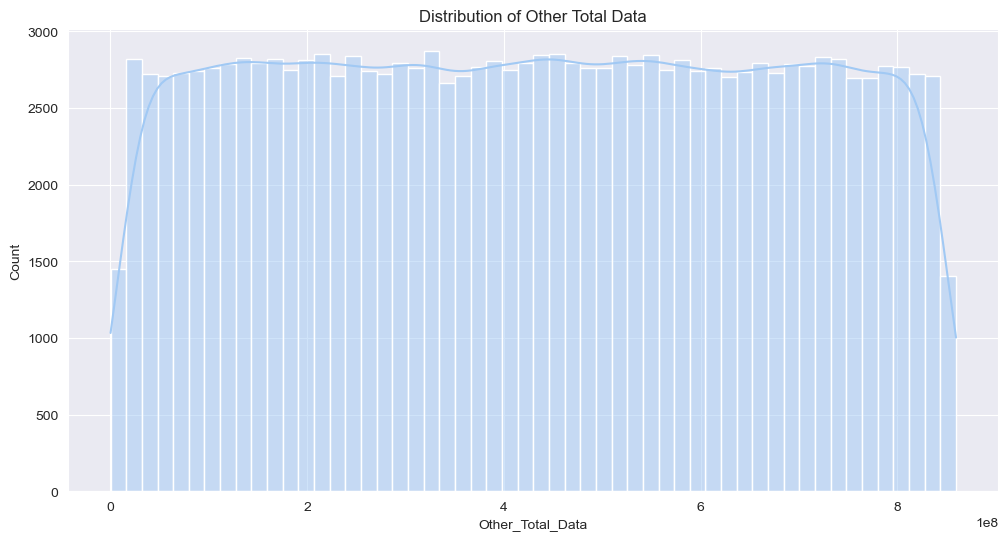

In [59]:
plt.figure(figsize=(12,6))
sns.histplot(df['Other_Total_Data'],kde=True)
plt.title('Distribution of Other Total Data')

#### Distribution of Total UL and DL

In [60]:
df[['Total UL and DL']].describe()

,Total UL and DL
count,146891
mean,495784159
std,244441632
min,28956107
25%,284485028
50%,496924346
75%,706637912
max,955984776


Text(0.5, 1.0, 'Distribution of Total UL and DL')

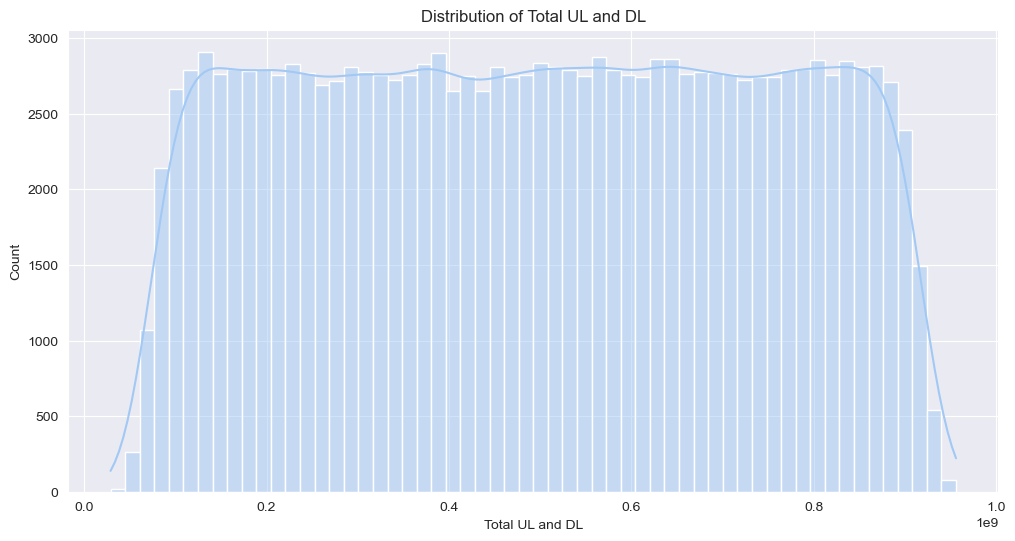

In [61]:
plt.figure(figsize=(12,6))
sns.histplot(df['Total UL and DL'],kde=True)
plt.title('Distribution of Total UL and DL')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146891 entries, 0 to 149999
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       146891 non-null  object        
 1   Start                           146891 non-null  datetime64[ns]
 2   Start ms                        146891 non-null  float64       
 3   End                             146891 non-null  datetime64[ns]
 4   End ms                          146891 non-null  float64       
 5   Dur. (ms)                       146891 non-null  float64       
 6   IMSI                            146891 non-null  float64       
 7   MSISDN/Number                   146891 non-null  float64       
 8   IMEI                            146891 non-null  float64       
 9   Last Location Name              146891 non-null  object        
 10  Avg RTT DL (ms)                 146891 non-null  float64     

#### Total Aggregates of Time

In [63]:
# Time aggregates
df['Start ms']=df['Start ms']
df['End ms']=df['End ms']
df['Start']=df['Start']
df['End']=df['End']
df['Avg Delay (ms)']=df['Avg RTT UL (ms)']+df['Avg RTT DL (ms)']
df['Dur. (ms)']=df['Dur. (ms)']
df['Dur. (ms).1']=df['Dur. (ms).1']
df["Activity_Duration(ms)"]=df['Activity Duration UL (ms)']+df['Activity Duration DL (ms)']

In [64]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Avg Delay (ms),Activity_Duration(ms)
0,13114483460844900352,2019-04-04 12:01:18,770,2019-04-25 14:35:31,662,1823652,208201448079117,33664962239,35521209507511,9164566995485190,42,5,23,44,100,0,0,0,100,0,0,0,37624,38787,1823652892,Samsung,Samsung Galaxy A5 Sm-A520F,213,214,1545765,24420,1634479,1271433,3563542,137762,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636,36749741,480624086,345629377,18355943,2905912,3701304,1570185,17855187,292426453,180558843,47,76411
1,13114483482878900224,2019-04-09 13:04:04,235,2019-04-25 08:15:48,606,1365104,208201909211140,33681854413,35794009006359,L77566A,65,5,16,26,100,0,0,0,100,0,0,0,168,3560,1365104371,Samsung,Samsung Galaxy J5 (Sm-J530),971,1022,1926113,7165,3493924,920172,629046,308339,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965,53800391,1180289203,707185356,39359124,4414096,937385,1933278,35565545,609920783,541959383,70,3728
2,13114483484080500736,2019-04-09 17:42:11,1,2019-04-25 11:58:13,652,1361762,208200314458056,33760627129,35281510359387,D42335A,106,18,6,9,100,0,0,0,100,0,0,0,0,0,1361762651,Samsung,Samsung Galaxy A8 (2018),751,695,1684053,42224,8535055,1694064,2690151,672973,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335,27883638,690499923,307690973,34425237,10229119,3363124,1726277,23751202,229980251,414908351,124,0
3,13114483485442799616,2019-04-10 00:31:25,486,2019-04-25 07:36:35,171,1321509,208201402342131,33750343200,35356610164913,T21824A,106,18,44,44,100,0,0,0,100,0,0,0,3330,37882,1321509685,undefined,undefined,17,207,644121,13372,9023734,2788027,1439754,631229,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530,43324218,1595068463,889352748,36534765,11811761,2070983,657493,15092588,810387875,761837216,124,41212
4,13114483499480700928,2019-04-12 20:10:23,565,2019-04-25 10:40:32,954,1089009,208201401415120,33699795932,35407009745539,D88865A,106,18,6,9,100,0,0,0,100,0,0,0,0,0,1089009389,Samsung,Samsung Sm-G390F,607,604,862600,50188,6248284,1500559,1936496,173853,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589,38542814,1119848089,607681403,34222253,7748843,2110349,912788,17539799,531237049,564619822,124,0


#### Total Speed Kbps Throughput

In [65]:
# total speed kbps
df['Avg Throughput (kbps)']=df['Avg Bearer TP UL (kbps)']+df['Avg Bearer TP DL (kbps)']

In [66]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Avg Delay (ms),Activity_Duration(ms),Avg Throughput (kbps)
0,13114483460844900352,2019-04-04 12:01:18,770,2019-04-25 14:35:31,662,1823652,208201448079117,33664962239,35521209507511,9164566995485190,42,5,23,44,100,0,0,0,100,0,0,0,37624,38787,1823652892,Samsung,Samsung Galaxy A5 Sm-A520F,213,214,1545765,24420,1634479,1271433,3563542,137762,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636,36749741,480624086,345629377,18355943,2905912,3701304,1570185,17855187,292426453,180558843,47,76411,67
1,13114483482878900224,2019-04-09 13:04:04,235,2019-04-25 08:15:48,606,1365104,208201909211140,33681854413,35794009006359,L77566A,65,5,16,26,100,0,0,0,100,0,0,0,168,3560,1365104371,Samsung,Samsung Galaxy J5 (Sm-J530),971,1022,1926113,7165,3493924,920172,629046,308339,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965,53800391,1180289203,707185356,39359124,4414096,937385,1933278,35565545,609920783,541959383,70,3728,42
2,13114483484080500736,2019-04-09 17:42:11,1,2019-04-25 11:58:13,652,1361762,208200314458056,33760627129,35281510359387,D42335A,106,18,6,9,100,0,0,0,100,0,0,0,0,0,1361762651,Samsung,Samsung Galaxy A8 (2018),751,695,1684053,42224,8535055,1694064,2690151,672973,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335,27883638,690499923,307690973,34425237,10229119,3363124,1726277,23751202,229980251,414908351,124,0,15
3,13114483485442799616,2019-04-10 00:31:25,486,2019-04-25 07:36:35,171,1321509,208201402342131,33750343200,35356610164913,T21824A,106,18,44,44,100,0,0,0,100,0,0,0,3330,37882,1321509685,undefined,undefined,17,207,644121,13372,9023734,2788027,1439754,631229,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530,43324218,1595068463,889352748,36534765,11811761,2070983,657493,15092588,810387875,761837216,124,41212,88
4,13114483499480700928,2019-04-12 20:10:23,565,2019-04-25 10:40:32,954,1089009,208201401415120,33699795932,35407009745539,D88865A,106,18,6,9,100,0,0,0,100,0,0,0,0,0,1089009389,Samsung,Samsung Sm-G390F,607,604,862600,50188,6248284,1500559,1936496,173853,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589,38542814,1119848089,607681403,34222253,7748843,2110349,912788,17539799,531237049,564619822,124,0,15


### Aggregate Categorical Variables

In [68]:
df['Handset Manufacturer']=df['Handset Manufacturer']
df['Handset Type']=df['Handset Type']
df['Last Location Name']=df['Last Location Name']
df['IMSI']=df['IMSI']
df['IMEI']=df['IMEI']

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146891 entries, 0 to 149999
Data columns (total 58 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       146891 non-null  object        
 1   Start                           146891 non-null  datetime64[ns]
 2   Start ms                        146891 non-null  float64       
 3   End                             146891 non-null  datetime64[ns]
 4   End ms                          146891 non-null  float64       
 5   Dur. (ms)                       146891 non-null  float64       
 6   IMSI                            146891 non-null  float64       
 7   MSISDN/Number                   146891 non-null  float64       
 8   IMEI                            146891 non-null  float64       
 9   Last Location Name              146891 non-null  object        
 10  Avg RTT DL (ms)                 146891 non-null  float64     

### Bivariate Analysis – explore the relationship between each application & the total DL+UL

In [70]:
columns = ['MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']

In [71]:
user_ratio_usage= df[columns].groupby('MSISDN/Number').sum()
user_ratio_usage.head(10)

,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
MSISDN/Number,,,,,,,,
33601001722,21624548,4389005,1331362,2232135,27180981,812458661,386570872,878690574
33601001754,12432223,5334863,3307781,2660565,11221763,119750078,281710071,156859643
33601002511,21333570,3443126,3205380,3195623,19353900,538827713,501693672,595966483
33601007832,6977321,9678493,2284670,280294,1942092,391126127,35279702,422320698
33601008617,41533002,18499616,3305469,2912542,49201724,1314797820,804804484,1457410944
33601010682,34347122,15263134,7848596,3792912,30315501,511635787,492372777,615217221
33601011634,26431335,10196403,1358959,2769627,45812397,548461057,224888713,654723066
33601011959,18892740,12023614,2215563,1782692,15292840,282364397,178201537,332660357
33601014694,63443802,14134211,4599825,5288685,54216117,833087952,1041882992,990132189


In [72]:
apps_columns = ['Dur. (ms)','MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']

In [73]:
user_ratio_usage = df[apps_columns]
user_ratio_usage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146891 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Dur. (ms)                146891 non-null  float64
 1   MSISDN/Number            146891 non-null  float64
 2   Youtube_Total_Data       146891 non-null  float64
 3   Google_Total_Data        146891 non-null  float64
 4   Email_Total_Data         146891 non-null  float64
 5   Social_Media_Total_Data  146891 non-null  float64
 6   Netflix_Total_Data       146891 non-null  float64
 7   Gaming_Total_Data        146891 non-null  float64
 8   Other_Total_Data         146891 non-null  float64
 9   Total UL and DL          146891 non-null  float64
dtypes: float64(10)
memory usage: 12.3 MB


In [74]:
user_ratio_usage.describe()

,Dur. (ms),MSISDN/Number,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
count,146891,146891,146891,146891,146891,146891,146891,146891,146891,146891
mean,105230,35968546536,22641990,7807978,2259078,1827740,22629360,430355126,429266672,495784159
std,80924,879202585567,9244557,3517121,1071128,1035571,9259223,244090217,243209547,244441632
min,7142,33601001722,129655,40330,8359,1563,98432,306358,149045,28956107
25%,58527,33651277770,15997340,4943585,1359012,931339,15981996,218698198,218470640,284485028
50%,86399,33663690391,22663408,7815399,2263843,1825390,22634588,431665078,429797759,496924346
75%,133154,33683436816,29293420,10683144,3159587,2727156,29288154,641572846,639665594,706637912
max,1859336,337000037000919,45190078,15528782,4518036,3650861,45198153,859202784,859520934,955984776


Text(0.5, 1.0, 'Total Data Vs. Gaming Data usage')

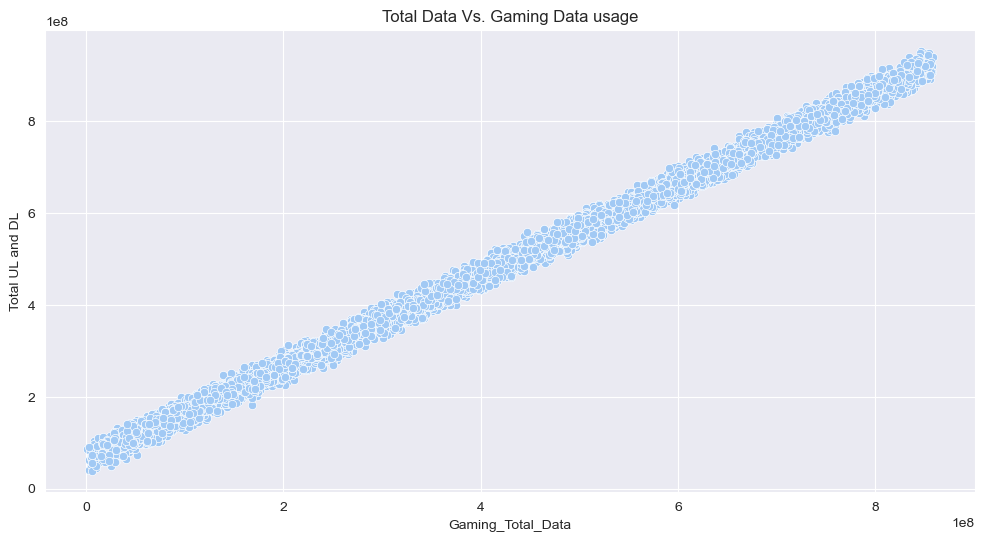

In [75]:
plt.figure(figsize=(12,6))
sns.scatterplot(user_ratio_usage.sample(10000),x='Gaming_Total_Data', y='Total UL and DL')
plt.title('Total Data Vs. Gaming Data usage')

#### Inference:
##### 1) From the above plot it can be easily seen that Total UL and DL is positively linearly related to Gaming Total Data

Text(0.5, 1.0, 'Total Data Vs. Youtube Data usage')

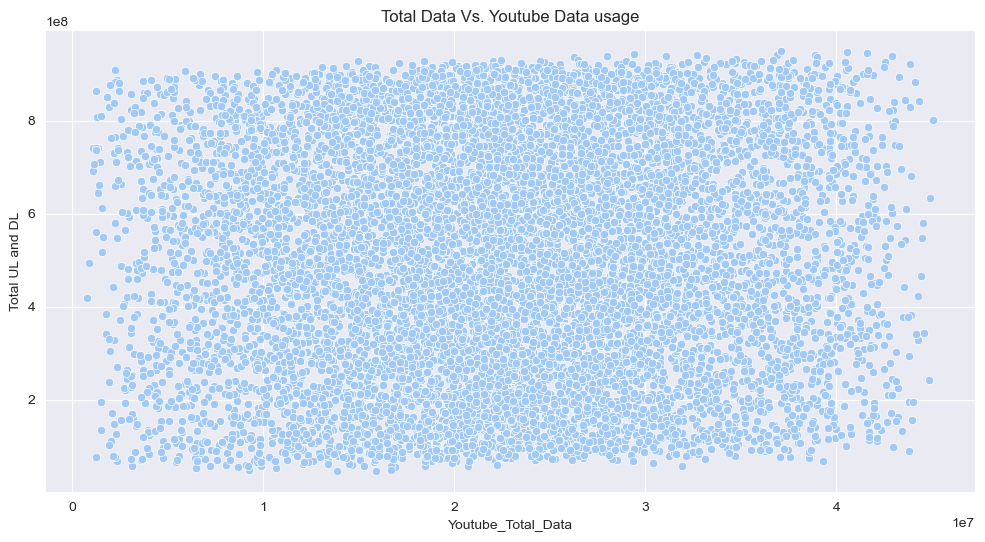

In [76]:
plt.figure(figsize=(12,6))
sns.scatterplot(user_ratio_usage.sample(10000),x='Youtube_Total_Data', y='Total UL and DL')
plt.title('Total Data Vs. Youtube Data usage')

#### Inference:
##### 1) No solid inference can be made from the above data  

Text(0.5, 1.0, 'Total Data Vs. Google Data usage')

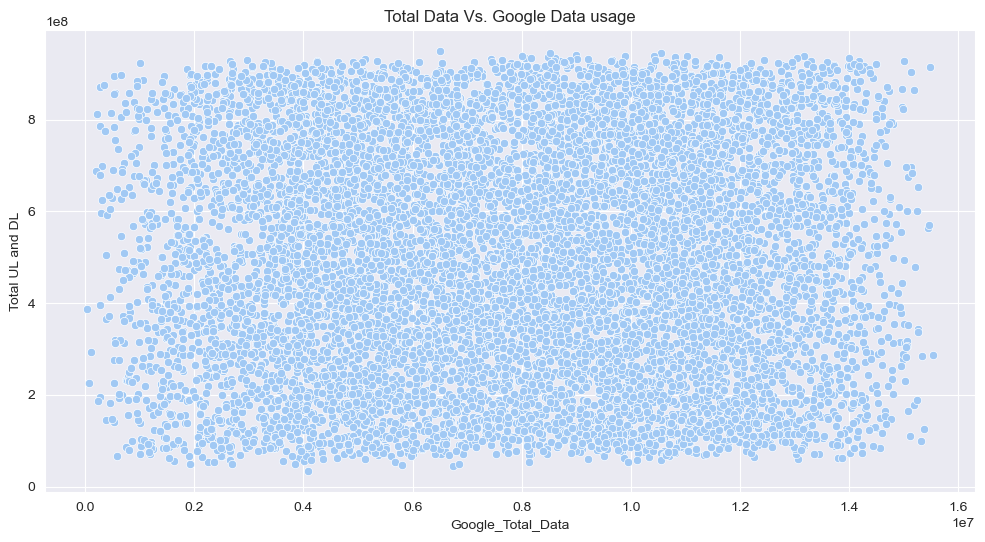

In [77]:
plt.figure(figsize=(12,6))
sns.scatterplot(user_ratio_usage.sample(10000),x='Google_Total_Data', y='Total UL and DL')
plt.title('Total Data Vs. Google Data usage')

#### Inference:
##### 1) No solid inference can be made from the above data

Text(0.5, 1.0, 'Total Data Vs. Email Data usage')

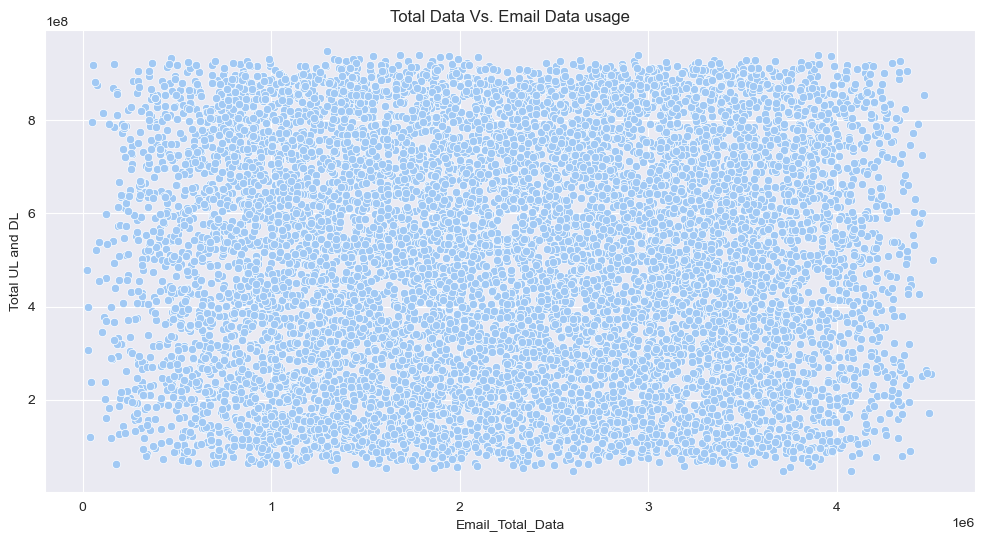

In [78]:
plt.figure(figsize=(12,6))
sns.scatterplot(user_ratio_usage.sample(10000),x='Email_Total_Data', y='Total UL and DL')
plt.title('Total Data Vs. Email Data usage')

#### Inference:
##### 1) No solid inference can be made from the above data

Text(0.5, 1.0, 'Total Data Vs. Social media Data usage')

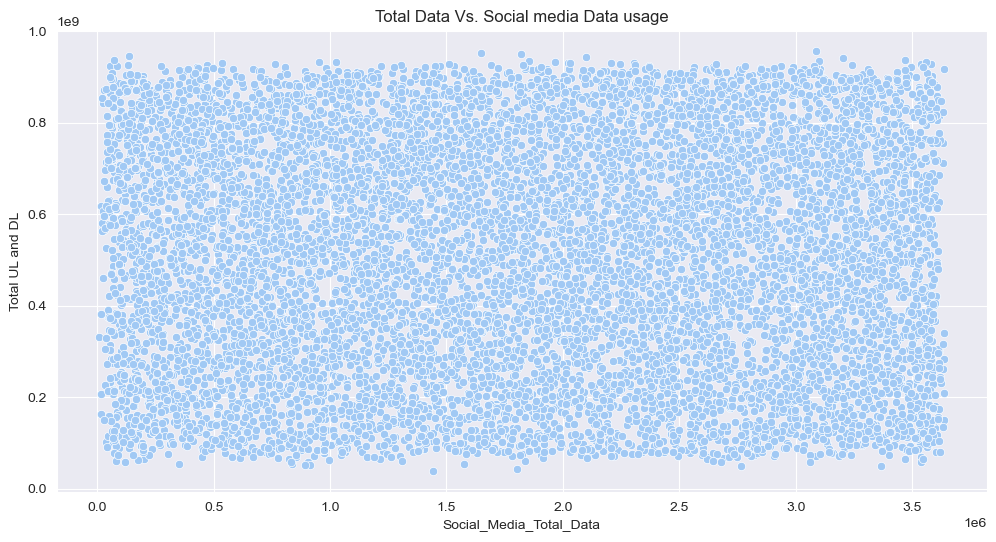

In [79]:
plt.figure(figsize=(12,6))
sns.scatterplot(user_ratio_usage.sample(10000),x='Social_Media_Total_Data', y='Total UL and DL')
plt.title('Total Data Vs. Social media Data usage')

#### Inference:
##### 1) No solid inference can be made from the above data

Text(0.5, 1.0, 'Total Data Vs. Netflix Data usage')

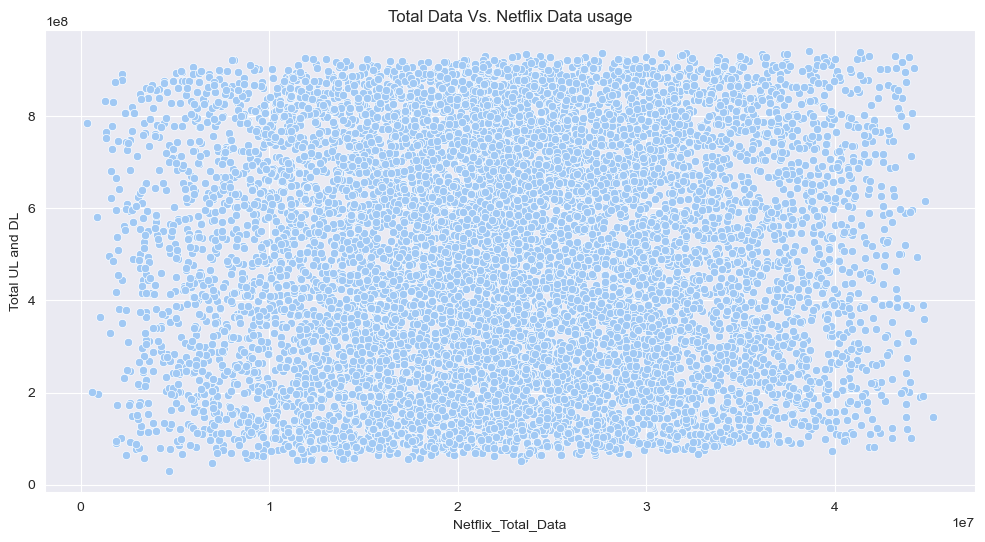

In [80]:
plt.figure(figsize=(12,6))
sns.scatterplot(user_ratio_usage.sample(10000),x='Netflix_Total_Data', y='Total UL and DL')
plt.title('Total Data Vs. Netflix Data usage')

Text(0.5, 1.0, 'Total Data Vs. Other Data usage')

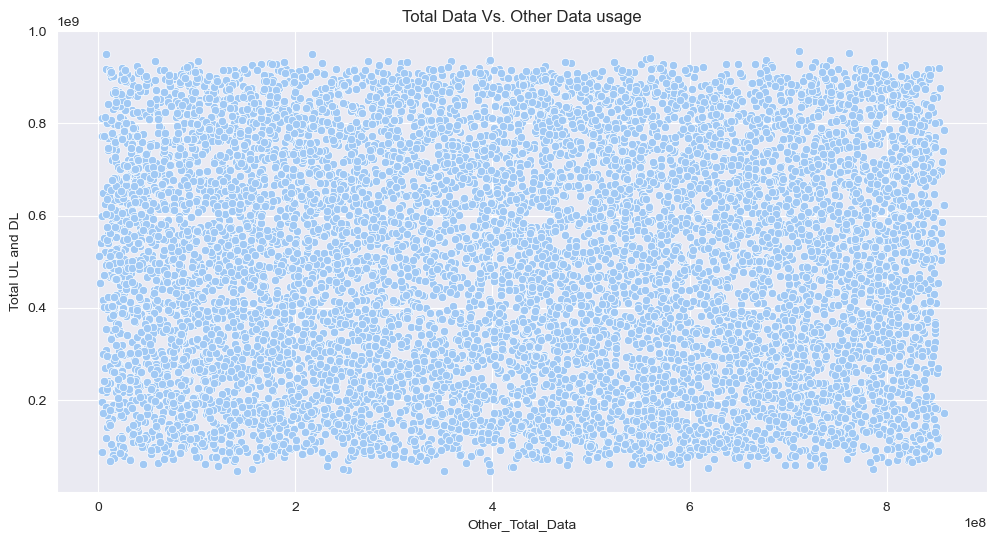

In [81]:
plt.figure(figsize=(12,6))
sns.scatterplot(user_ratio_usage.sample(10000),x='Other_Total_Data', y='Total UL and DL')
plt.title('Total Data Vs. Other Data usage')

#### Variable Transformations
##### total duration for all sessions and compute the total data (DL+UL) per decile class

In [82]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Avg Delay (ms),Activity_Duration(ms),Avg Throughput (kbps)
0,13114483460844900352,2019-04-04 12:01:18,770,2019-04-25 14:35:31,662,1823652,208201448079117,33664962239,35521209507511,9164566995485190,42,5,23,44,100,0,0,0,100,0,0,0,37624,38787,1823652892,Samsung,Samsung Galaxy A5 Sm-A520F,213,214,1545765,24420,1634479,1271433,3563542,137762,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636,36749741,480624086,345629377,18355943,2905912,3701304,1570185,17855187,292426453,180558843,47,76411,67
1,13114483482878900224,2019-04-09 13:04:04,235,2019-04-25 08:15:48,606,1365104,208201909211140,33681854413,35794009006359,L77566A,65,5,16,26,100,0,0,0,100,0,0,0,168,3560,1365104371,Samsung,Samsung Galaxy J5 (Sm-J530),971,1022,1926113,7165,3493924,920172,629046,308339,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965,53800391,1180289203,707185356,39359124,4414096,937385,1933278,35565545,609920783,541959383,70,3728,42
2,13114483484080500736,2019-04-09 17:42:11,1,2019-04-25 11:58:13,652,1361762,208200314458056,33760627129,35281510359387,D42335A,106,18,6,9,100,0,0,0,100,0,0,0,0,0,1361762651,Samsung,Samsung Galaxy A8 (2018),751,695,1684053,42224,8535055,1694064,2690151,672973,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335,27883638,690499923,307690973,34425237,10229119,3363124,1726277,23751202,229980251,414908351,124,0,15
3,13114483485442799616,2019-04-10 00:31:25,486,2019-04-25 07:36:35,171,1321509,208201402342131,33750343200,35356610164913,T21824A,106,18,44,44,100,0,0,0,100,0,0,0,3330,37882,1321509685,undefined,undefined,17,207,644121,13372,9023734,2788027,1439754,631229,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530,43324218,1595068463,889352748,36534765,11811761,2070983,657493,15092588,810387875,761837216,124,41212,88
4,13114483499480700928,2019-04-12 20:10:23,565,2019-04-25 10:40:32,954,1089009,208201401415120,33699795932,35407009745539,D88865A,106,18,6,9,100,0,0,0,100,0,0,0,0,0,1089009389,Samsung,Samsung Sm-G390F,607,604,862600,50188,6248284,1500559,1936496,173853,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589,38542814,1119848089,607681403,34222253,7748843,2110349,912788,17539799,531237049,564619822,124,0,15


In [83]:
# Keep relevant columns
scaled_df = user_ratio_usage[['MSISDN/Number', 'Total UL and DL', 'Dur. (ms)']].copy()

# Convert duration to seconds
scaled_df['Duration'] = scaled_df['Dur. (ms)'] / 1000

# Aggregate per user
scaled_df = scaled_df.groupby('MSISDN/Number').agg({
    'Duration': 'sum',
    'Total UL and DL': 'sum'
})

# Create deciles on Duration
deciles = pd.qcut(scaled_df['Duration'], 5, labels=[
    "1st_decile", "2nd_decile", "3rd_decile", "4th_decile", "5th_decile"
])

# Copy and add decile column
explore_feature_df_with_decile = scaled_df.copy()
explore_feature_df_with_decile['Decile'] = deciles

# Aggregate per decile
explore_feature_df_with_decile_agg = explore_feature_df_with_decile.groupby('Decile').agg({
    'Total UL and DL': 'sum',
    'Duration': 'sum',
    'Decile': 'count'
})

explore_feature_df_with_decile_agg


C:\Users\Animesh Singh\AppData\Local\Temp\ipykernel_2308\2645406868.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  explore_feature_df_with_decile_agg = explore_feature_df_with_decile.groupby('Decile').agg({


,Total UL and DL,Duration,Decile
Decile,,,
1st_decile,11430240255750,647474,21144
2nd_decile,12271273967186,1778391,22346
3rd_decile,11566628145365,2130275,19941
4th_decile,13774338350891,3414760,21144
5th_decile,23783750217140,7486423,21144


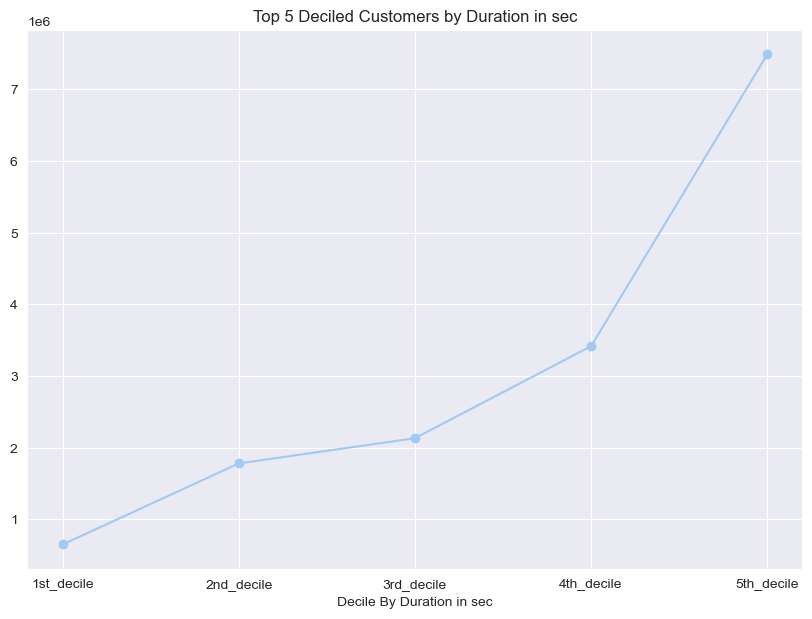

In [84]:
plt.figure(figsize=(10,7))
explore_feature_df_with_decile_agg['Duration'].plot(linestyle='-', marker='o', figsize=(10,7), title='Top 5 Deciled Customers by Duration in sec').set_xlabel("Decile By Duration in sec")
plt.xticks(np.arange(len(explore_feature_df_with_decile_agg.index)), explore_feature_df_with_decile_agg.index)

plt.show()

### Correlation Analysis

In [86]:
columns = ['Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']
corr = user_ratio_usage[columns].corr()
corr

,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
Youtube_Total_Data,1,0,-0,0,0,-0,0,0
Google_Total_Data,0,1,-0,-0,-0,-0,-0,0
Email_Total_Data,-0,-0,1,0,0,0,-0,0
Social_Media_Total_Data,0,-0,0,1,0,0,0,0
Netflix_Total_Data,0,-0,0,0,1,-0,-0,0
Gaming_Total_Data,-0,-0,0,0,-0,1,-0,1
Other_Total_Data,0,-0,-0,0,-0,-0,1,-0
Total UL and DL,0,0,0,0,0,1,-0,1


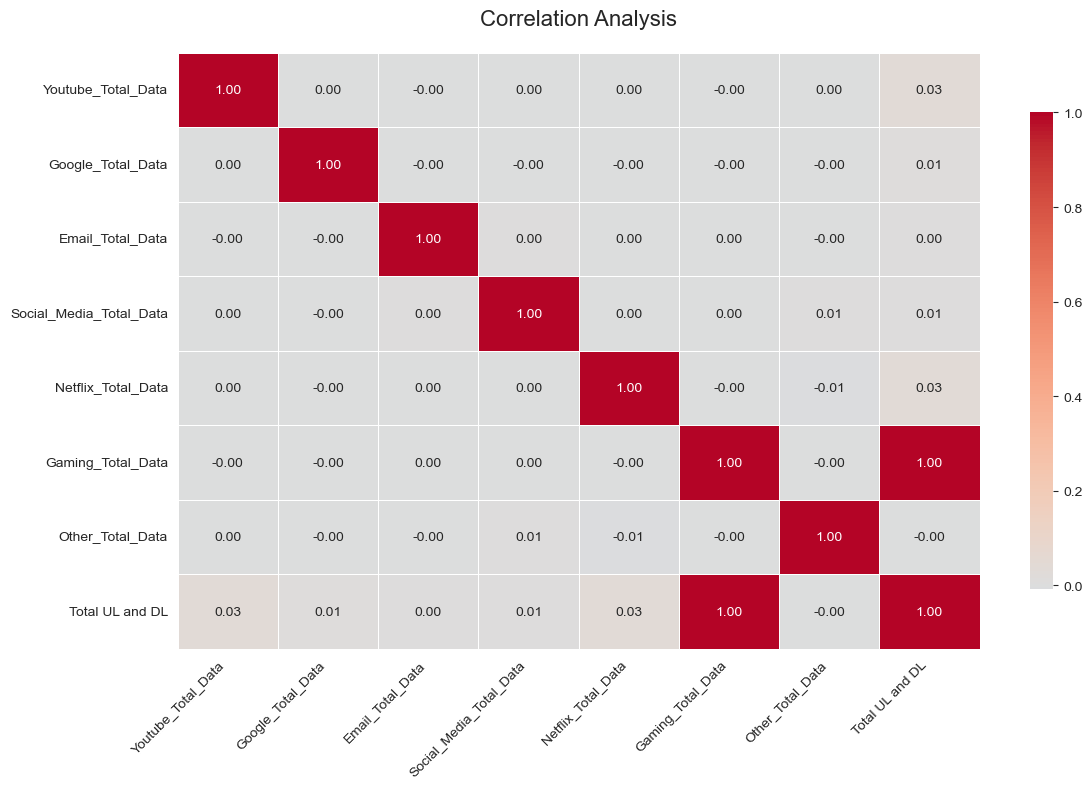

In [91]:
plt.figure(figsize=(12, 8))  # Bigger size for readability
sns.heatmap(
    corr,
    annot=True,          # Show correlation values
    fmt=".2f",           # Format values with 2 decimals
    cmap="coolwarm",     # Nice diverging colormap
    center=0,            # Center around 0
    linewidths=0.5,      # Thin lines between cells
    cbar_kws={"shrink": 0.8}  # Smaller color bar
)

plt.title("Correlation Analysis", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for clarity
plt.yticks(rotation=0)               # Keep y labels horizontal
plt.tight_layout()
plt.show()

### Inference : 
##### 1) From the above heatmap it can be observed that Gaming data is totally co-related with total Upload and Download.
##### 2) All the other apps co-realation is almost negligible

### Dimensionality Reduction

In [93]:
numeric_df= user_ratio_usage.select_dtypes(include='float64')

In [94]:
numeric_df.describe()

,Dur. (ms),MSISDN/Number,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
count,146891,146891,146891,146891,146891,146891,146891,146891,146891,146891
mean,105230,35968546536,22641990,7807978,2259078,1827740,22629360,430355126,429266672,495784159
std,80924,879202585567,9244557,3517121,1071128,1035571,9259223,244090217,243209547,244441632
min,7142,33601001722,129655,40330,8359,1563,98432,306358,149045,28956107
25%,58527,33651277770,15997340,4943585,1359012,931339,15981996,218698198,218470640,284485028
50%,86399,33663690391,22663408,7815399,2263843,1825390,22634588,431665078,429797759,496924346
75%,133154,33683436816,29293420,10683144,3159587,2727156,29288154,641572846,639665594,706637912
max,1859336,337000037000919,45190078,15528782,4518036,3650861,45198153,859202784,859520934,955984776


In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(numeric_df)

StandardScaler()

In [97]:
scaled_data = scaler.transform(numeric_df)

In [98]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(scaled_data)

PCA(n_components=10)

In [99]:
x_pca = pca.transform(scaled_data)

Text(0, 0.5, 'Second Principal Component')

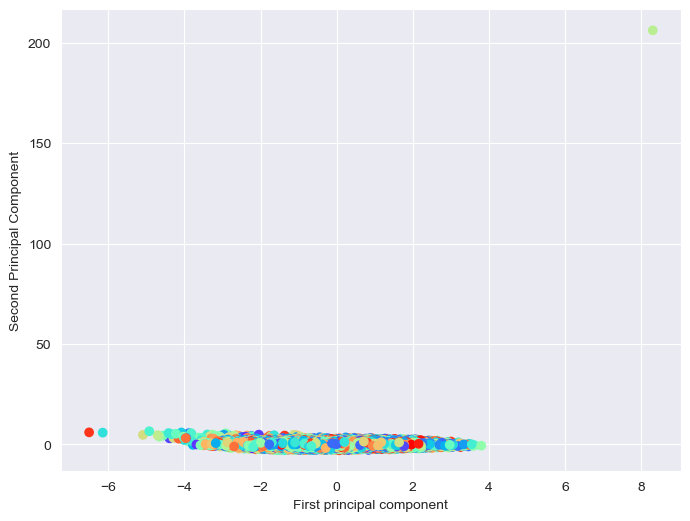

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,4],x_pca[:,1],c=user_ratio_usage['Total UL and DL'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Cumulative explained variance')

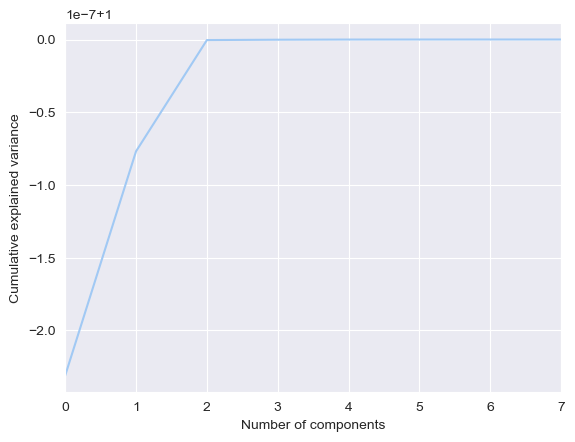

In [105]:
# compare pca number of components with logistic regression algorithm for classification
from sklearn.decomposition import PCA
pca = PCA().fit(numeric_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [106]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(numeric_df)
Y_sklearn

array([[-2.30358417e+09, -2.02782975e+08, -2.49471055e+08,
         1.06844156e+07,  3.94389637e+05, -4.11078631e+06],
       [-2.28669211e+09,  2.76060647e+08,  1.13727443e+08,
        -3.03325376e+07,  2.68393599e+06, -4.05332435e+06],
       [-2.20791950e+09, -2.74620068e+08, -1.53850415e+07,
        -1.28882660e+07,  7.56545756e+06,  9.63728990e+05],
       ...,
       [-2.30509670e+09,  2.89756101e+08,  2.86451658e+08,
        -1.24669548e+07, -1.31477307e+07, -6.20888246e+06],
       [-2.34665611e+09,  1.90958786e+08, -2.96138665e+08,
         5.37096341e+06,  6.77933139e+06, -3.21464810e+05],
       [-2.34892485e+09, -1.21350866e+08,  3.86398416e+08,
         1.53969546e+07,  2.91856385e+05, -1.31802226e+06]])

In [108]:
# Create a clean user overview file in CSV format
user_ratio_usage.to_csv('D:\\Digicrome classes\\NextHIkes\\Project 5\\user_overview_data.csv',index=False)